## Project Doggone

I want to focus on dogs only. Does breed, age or gender matter on the outcome of the dog?  I think gender won't matter as much as age and breed, with puppies and young dogs having the highest adoption rates and Pit Bulls having a harder time, with higher numbers of being in the shelter and more negative outcomes than other breeds.

> Importing the necessary packages. Reading in the data. Showing what columns I have to begin with :

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137102 entries, 0 to 137101
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         137102 non-null  object
 1   Name              96100 non-null   object
 2   DateTime          137102 non-null  object
 3   MonthYear         137102 non-null  object
 4   Date of Birth     137102 non-null  object
 5   Outcome Type      137078 non-null  object
 6   Outcome Subtype   62654 non-null   object
 7   Animal Type       137102 non-null  object
 8   Sex upon Outcome  137100 non-null  object
 9   Age upon Outcome  137097 non-null  object
 10  Breed             137102 non-null  object
 11  Color             137102 non-null  object
dtypes: object(12)
memory usage: 12.6+ MB


> Dropping columns I don't need :

In [114]:
df.drop(columns=['Name'], inplace=True)
df.drop(columns=['DateTime'], inplace=True)
df.drop(columns=['Outcome Subtype'], inplace=True)
df.drop(columns=['Date of Birth'], inplace=True)
df.head()

,Animal ID,MonthYear,Outcome Type,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,19-May,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,18-Jul,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,20-Aug,Euthanasia,Other,Unknown,1 year,Raccoon,Gray
3,A720371,16-Feb,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,14-Mar,Transfer,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


>  Seeing what Animal Types, then dropping all but dogs :

In [115]:
df['Animal Type'].value_counts()


Dog          77096
Cat          52092
Other         7253
Bird           636
Livestock       25
Name: Animal Type, dtype: int64

In [116]:
df = df[df['Animal Type'] !='Cat']
df = df[df['Animal Type'] !='Other']
df = df[df['Animal Type'] !='Bird']
df = df[df['Animal Type'] !='Livestock']
df.head()


,Animal ID,MonthYear,Outcome Type,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
1,A776359,18-Jul,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A720371,16-Feb,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
5,A659412,20-Oct,Adoption,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown
6,A814515,20-May,Adoption,Dog,Neutered Male,2 years,American Foxhound/Labrador Retriever,White/Brown
9,A840370,21-Aug,Adoption,Dog,Spayed Female,2 years,Border Collie/Cardigan Welsh Corgi,Black/White


> The next two cells, checking for missing data.  There isn't much missing so it shouldn't have an impact worth noting for my purpose, but I have it if I need it for later.

In [117]:
df.isnull().sum()

Animal ID            0
MonthYear            0
Outcome Type        15
Animal Type          0
Sex upon Outcome     2
Age upon Outcome     2
Breed                0
Color                0
dtype: int64

In [118]:
missing_outcome_type = pd.isnull(df['Outcome Type'])
df[missing_outcome_type].head()

,Animal ID,MonthYear,Outcome Type,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
3416,A828272,21-Feb,NaN,Dog,Neutered Male,1 year,Blue Lacy Mix,Blue/White
9040,A700839,21-Jan,NaN,Dog,Neutered Male,6 years,Pit Bull Mix,Blue
14612,A841539,21-Aug,NaN,Dog,Intact Male,2 years,German Shepherd,Black/Tan
20026,A827712,21-Jan,NaN,Dog,Spayed Female,10 months,German Shepherd,Tan/Black
24113,A828543,21-Jan,NaN,Dog,Spayed Female,6 months,Labrador Retriever/Border Collie,Black/White


> resetting the index to make it easier to use later :

In [119]:
df = df.reset_index(drop=True)
df.head()

,Animal ID,MonthYear,Outcome Type,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A776359,18-Jul,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
1,A720371,16-Feb,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
2,A659412,20-Oct,Adoption,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown
3,A814515,20-May,Adoption,Dog,Neutered Male,2 years,American Foxhound/Labrador Retriever,White/Brown
4,A840370,21-Aug,Adoption,Dog,Spayed Female,2 years,Border Collie/Cardigan Welsh Corgi,Black/White


> ### First I'll focus on Breed.

In [120]:
df['Breed'].value_counts()  

Pit Bull Mix                         8940
Labrador Retriever Mix               7397
Chihuahua Shorthair Mix              6519
German Shepherd Mix                  3306
Pit Bull                             1842
                                     ... 
Schnauzer Giant/Otterhound              1
Greyhound/Border Collie                 1
Miniature Schnauzer/West Highland       1
Alaskan Husky/Collie Smooth             1
Standard Schnauzer/Siberian Husky       1
Name: Breed, Length: 2421, dtype: int64

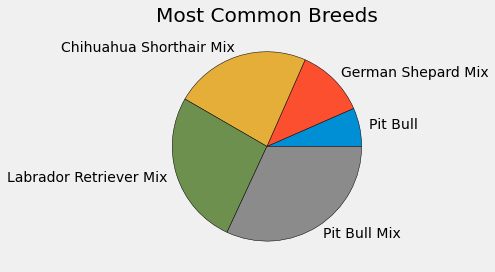

In [121]:
plt.style.use("fivethirtyeight")

slices = [1842,3306,6519,7397,8940]
labels = ['Pit Bull', 'German Shepard Mix', 'Chihuahua Shorthair Mix', 'Labrador Retriever Mix', 'Pit Bull Mix']
#colors = ['blue', 'orange', 'green', 'yellow', 'gray']

plt.pie(slices, labels=labels, 
    wedgeprops={'edgecolor': 'black'})


plt.title("Most Common Breeds")
plt.tight_layout()
plt.show()

> ### Now let's look at Age. 
> First, I want to see the unique values.  Then I made a dictionary to group the ages as follows:<BR>
puppy (up to a year) , young (1-3) , adult (4-9) , and elder (10 and over).  I am not including -years or 0 years.

In [122]:
df['Age upon Outcome'].sort_values(ascending=True).unique()

array(['-1 years', '-2 years', '-3 years', '0 years', '1 day', '1 month',
       '1 week', '1 weeks', '1 year', '10 months', '10 years',
       '11 months', '11 years', '12 years', '13 years', '14 years',
       '15 years', '16 years', '17 years', '18 years', '19 years',
       '2 days', '2 months', '2 weeks', '2 years', '20 years', '23 years',
       '24 years', '3 days', '3 months', '3 weeks', '3 years', '4 days',
       '4 months', '4 weeks', '4 years', '5 days', '5 months', '5 weeks',
       '5 years', '6 days', '6 months', '6 years', '7 months', '7 years',
       '8 months', '8 years', '9 months', '9 years', nan], dtype=object)

In [123]:
age = {'1 day': 'puppy', '1 month': 'puppy', '1 week': 'puppy', '1 weeks': 'puppy','10 months': 'puppy', '11 months': 'puppy' ,
'2 days': 'puppy', '2 months': 'puppy', '2 weeks': 'puppy', '3 days':'puppy', '3 months': 'puppy', '3 weeks':'puppy', '4 days':'puppy', 
'4 months':'puppy', '4 weeks':'puppy', '5 days': 'puppy', '5 months': 'puppy', '5 weeks':'puppy', '6 days':'puppy', '6 months':'puppy',
'7 months':'puppy', '8 months':'puppy', '9 months':'puppy', '1 year':'young', '2 years':'young', '10 years':'elder', '11 years':'elder',
'12 years':'elder', '13 years':'elder', '14 years': 'elder', '15 years': 'elder', '16 years':'elder', '17 years':'elder' , '18 years':'elder',
'19 years':'elder', '20 years':'elder', '23 years':'elder', '24 years':'elder', '3 years':'young', '4 years':'adult', '5 years': 'adult',
'6 years':'adult', '7 years':'adult', '8 years':'adult', '9 years':'adult'}

df['Age Group'] = df['Age upon Outcome'].map(age)

df['Age Group'].value_counts()

young    35349
puppy    23376
adult    14393
elder     3911
Name: Age Group, dtype: int64

In [124]:
#check to make sure my changes are reflected 
df.head()

,Animal ID,MonthYear,Outcome Type,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Group
0,A776359,18-Jul,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,young
1,A720371,16-Feb,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,puppy
2,A659412,20-Oct,Adoption,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown,adult
3,A814515,20-May,Adoption,Dog,Neutered Male,2 years,American Foxhound/Labrador Retriever,White/Brown,young
4,A840370,21-Aug,Adoption,Dog,Spayed Female,2 years,Border Collie/Cardigan Welsh Corgi,Black/White,young


> ### Now let's simplify Gender. 
> I don't need to keep track of neutered/spayed for my objective, so I'll repeat what I did before, with the addition of dropping 'Sex upon Outcome' and replacing with 'Gender'.

In [125]:
df['Sex upon Outcome'].value_counts()

Neutered Male    32061
Spayed Female    27505
Intact Male       9090
Intact Female     7934
Unknown            504
Name: Sex upon Outcome, dtype: int64

In [126]:
sex = {'Neutered Male':'Male', 'Intact Male':'Male', 'Spayed Female':'Female', 'Intact Female':'Female'}

df['Gender'] = df['Sex upon Outcome'].map(sex)

df['Gender'].replace(sex)

0          Male
1          Male
2        Female
3          Male
4        Female
          ...  
77091      Male
77092    Female
77093      Male
77094      Male
77095      Male
Name: Gender, Length: 77096, dtype: object

In [127]:
df.drop(columns=['Sex upon Outcome'], inplace=True)

In [128]:
#check to make sure my changes are reflected
df.head()

,Animal ID,MonthYear,Outcome Type,Animal Type,Age upon Outcome,Breed,Color,Age Group,Gender
0,A776359,18-Jul,Adoption,Dog,1 year,Chihuahua Shorthair Mix,White/Brown,young,Male
1,A720371,16-Feb,Adoption,Dog,4 months,Anatol Shepherd/Labrador Retriever,Buff,puppy,Male
2,A659412,20-Oct,Adoption,Dog,7 years,Chihuahua Shorthair Mix,Brown,adult,Female
3,A814515,20-May,Adoption,Dog,2 years,American Foxhound/Labrador Retriever,White/Brown,young,Male
4,A840370,21-Aug,Adoption,Dog,2 years,Border Collie/Cardigan Welsh Corgi,Black/White,young,Female


In [129]:
df['Gender'].value_counts()

Male      41151
Female    35439
Name: Gender, dtype: int64

> ### Now let's bring in Outcome

In [130]:
df['Outcome Type'].value_counts()

Adoption           36987
Return to Owner    20325
Transfer           16831
Euthanasia          1888
Rto-Adopt            673
Died                 296
Disposal              49
Missing               32
Name: Outcome Type, dtype: int64

> I'll filter using conditionals so I can group the Outcomes. 

In [131]:
vet_death = df['Outcome Type'] == 'Euthanasia' 
death_unknown = df['Outcome Type'] == 'Died'
came_dead = df['Outcome Type'] == 'Disposal'
return_to_owner = df['Outcome Type'] == 'Return to Owner'
return_to_owner_adopt = df['Outcome Type'] == 'Rto-Adopt'
still_waiting = df['Outcome Type'] == 'Transfer'
adopted = df['Outcome Type'] == 'Adoption'
unknown = df['Outcome Type'] == 'Missing'


In [132]:
df.loc[vet_death, ['Breed','Age Group', 'Gender']].value_counts()

Breed                      Age Group  Gender
Pit Bull Mix               young      Male      157
                                      Female    129
                           adult      Male       75
                                      Female     52
Chihuahua Shorthair Mix    young      Male       32
                                               ... 
Collie Rough Mix           elder      Female      1
Cocker Spaniel Mix         young      Male        1
                           puppy      Female      1
                           elder      Female      1
Yorkshire Terrier/Maltese  young      Male        1
Length: 617, dtype: int64

The above shows more males than females were euthanized.  More young dogs and more Pit Bull mix. Followed by Chihuahua.  Make note that Pit Bull mix had 413 deaths , while the second highest breed had 32 : 381 more lives taken between the two highest breeds. 

>> Graphing the stark difference between breed and death 

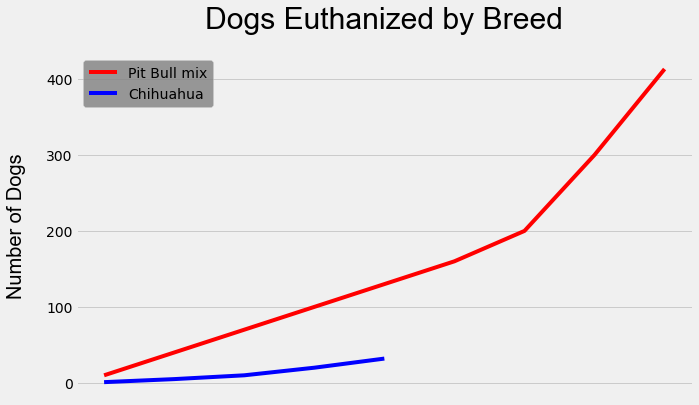

In [133]:
#Use function to change the size of the graph

def cm_to_inch(value):
    return value/2.54

dogs_y = [10, 40 ,70, 100, 130, 160, 200, 300, 413]
dogs_x = []

plt.figure(figsize=(cm_to_inch(25), cm_to_inch(15)))
plt.plot(dogs_y, color="red", label="Pit Bull mix")

chi_y = [1, 5, 10, 20, 32, ]

plt.plot(chi_y, color="blue", label="Chihuahua")

plt.legend(facecolor='gray')


plt.title("Dogs Euthanized by Breed", color='black', font='Arial', size=30, pad=25)

plt.ylabel("Number of Dogs",color="black",labelpad=20, font='Arial', size=20)

ax = plt.gca()
ax.get_xaxis().set_visible(False)

plt.show()

In [134]:
df.loc[death_unknown, ['Breed','Age Group', 'Gender']].value_counts()

Breed                          Age Group  Gender
Chihuahua Shorthair Mix        puppy      Male      13
Labrador Retriever Mix         puppy      Female    10
Pit Bull Mix                   puppy      Female     8
Chihuahua Shorthair Mix        puppy      Female     7
                               young      Male       7
                                                    ..
Dachshund Mix                  puppy      Female     1
Dachshund/Beagle               young      Male       1
Dachshund/Chihuahua Shorthair  young      Male       1
Dachshund/Miniature Poodle     adult      Male       1
Great Dane                     adult      Male       1
Length: 168, dtype: int64

The above shows more females than males died from unknown, with most being puppies.  The highest number in breed being Chihuahua followed closely by Labrador. 

In [135]:
df.loc[came_dead, ['Breed','Age Group', 'Gender']].value_counts()

Breed                              Age Group  Gender
Pit Bull                           young      Male      3
Labrador Retriever                 puppy      Female    2
Pit Bull                           puppy      Male      2
Collie Smooth                      puppy      Female    2
Mastiff                            adult      Female    1
Miniature Poodle Mix               adult      Female    1
Norwich Terrier Mix                young      Male      1
Pit Bull                           puppy      Female    1
Pit Bull Mix                       young      Male      1
Labrador Retriever Mix             puppy      Male      1
Rat Terrier Mix                    young      Male      1
Siberian Husky Mix                 young      Male      1
St. Bernard Rough Coat Mix         young      Male      1
Toy Fox Terrier                    elder      Male      1
Unknown                            puppy      Female    1
                                   young      Male      1
Labrador Retriever 

The above shows that the distribution of breed and sex that came to the shelter already dead was pretty even, with mostly young dogs and puppies.

In [136]:
df.loc[return_to_owner_adopt, ['Breed','Age Group', 'Gender']].value_counts()

Breed                              Age Group  Gender
Pit Bull Mix                       young      Male      42
                                   adult      Male      25
Pit Bull                           young      Male      20
                                              Female    18
Pit Bull Mix                       young      Female    17
                                                        ..
Chow Chow Mix                      adult      Male       1
                                   elder      Male       1
                                   puppy      Male       1
Collie Rough Mix                   young      Female     1
Yorkshire Terrier/Standard Poodle  young      Male       1
Length: 325, dtype: int64

The above shows that the top 5 results of breeds returned to owner through adoption is :  91 males, 36 females . 99 young , 26 adult , 1 puppy , 1 elder . With Pit Bull mix having the most with 84 , then Pit Bull with 38 , Chow Chow mix 3 , Collie Rough 1 and Yorkshire Terrier / Standard Poodle 1 

In [137]:
df.loc[return_to_owner, ['Breed','Age Group', 'Gender']].value_counts()

Breed                               Age Group  Gender
Pit Bull Mix                        young      Male      986
                                               Female    684
                                    adult      Male      463
Labrador Retriever Mix              young      Male      426
Chihuahua Shorthair Mix             young      Male      399
                                                        ... 
Labrador Retriever/Standard Poodle  adult      Female      1
Labrador Retriever/Staffordshire    young      Male        1
Catahoula/German Shepherd           young      Male        1
Labrador Retriever/Siberian Husky   young      Female      1
Yorkshire Terrier/Toy Poodle        young      Male        1
Length: 2962, dtype: int64

The above shows that the top 5 results of breeds returned is : 2,275 males , 685 female . with young being the most frequent age group . Pit Bull mix by far has the highest rate with 2,133 

In [138]:
df.loc[still_waiting, ['Breed','Age Group', 'Gender']].value_counts()

Breed                            Age Group  Gender
Pit Bull Mix                     young      Male      480
                                            Female    404
Labrador Retriever Mix           puppy      Female    395
                                            Male      395
Chihuahua Shorthair Mix          young      Male      390
                                                     ... 
Doberman Pinsch/Dachshund        puppy      Male        1
Doberman Pinsch/Border Collie    puppy      Female      1
Doberman Pinsch/Black/Tan Hound  puppy      Female      1
Doberman Pinsch/Black Mouth Cur  puppy      Male        1
Yorkshire Terrier/Toy Poodle     young      Male        1
Length: 2796, dtype: int64

The above shows that the top 5 results of breeds that are still waiting in the shelter : 1,266 males to 800 females.  1,274 young , 792 puppies . With the top breed being Pit Bull mix with 884 , followed close with Labrador 790 , then Chihuahua with 390

In [139]:
df.loc[adopted, ['Breed','Age Group', 'Gender']].value_counts()

Breed                                Age Group  Gender
Labrador Retriever Mix               puppy      Female    1126
Pit Bull Mix                         young      Male      1095
                                                Female    1075
Labrador Retriever Mix               puppy      Male      1004
Chihuahua Shorthair Mix              young      Male       823
                                                          ... 
Dachshund/Pbgv                       young      Male         1
Dachshund/Pembroke Welsh Corgi       puppy      Male         1
                                     young      Male         1
Dachshund/Pomeranian                 adult      Female       1
Yorkshire Terrier/Yorkshire Terrier  adult      Male         1
Length: 4212, dtype: int64

The above shows  2,923 male to 2,201 female dogs adopted.  With the two youngest age groups leading adoptions with: 2,994 young 2,130 puppies . The top two breeds adopted were: Pit Bull mix with 2,170 and Labrador Retriever mix with 2,130

> ### In conclusion, I was correct with most of my assumptions.  I was surprised by the number of puppies / young dogs with death from unknown causes, but when I began this project I didn't consider pregnant dogs and common illnesses that can kill a litter.  